# Overview

In this notebook I'll use trained model to generate captions for images in the test dataset.

# Imports

First of all required packages should be imported.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import pytorch_lightning as pl

from datamodule import CocoDataModule
from model import CaptioningModel
from torchvision import transforms as transforms

from utils import result_to_text

# Data

Let's define all required transformations and instantiate data module.

In [2]:
transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.ToTensor()
])

dm = CocoDataModule(transformations)

data_loader = dm.test_dataloader()
vocabulary = data_loader.dataset.vocab
vocab_size = len(vocabulary)

Vocabulary successfully loaded from ./vocab.pkl file!


# Model

The repository contains the model weights in the `models` subdirectory. Unfortunately, the result checkpoint file is too large to be stored in the GitHub repository, so it had to be split into separate files for the encoder and the decoder.

The loading process is shown below.

In [24]:
# Create instance of the model without loading weights 
# for CNN model incide encoder
model = CaptioningModel(
    embed_size=256,
    hidden_size=256,
    vocab_size = vocab_size,
    num_layers=2,
    use_pretrained_encoder=False
)

# Load state dict for encoder and decoder
model.encoder.load_state_dict(torch.load('./models/encoder.pkl')['encoder_state_dict'])
model.decoder.load_state_dict(torch.load('./models/decoder.pkl')['decoder_state_dics'])

# Set model to eval state
model.eval()

CaptioningModel(
  (encoder): EncoderCNN(
    (resnet): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)


# Evaluation

Let's have a look what the model can do. We can use images from test set.

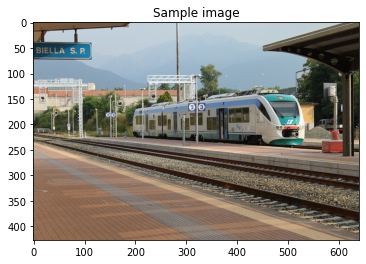

A train is going down the tracks near a train.


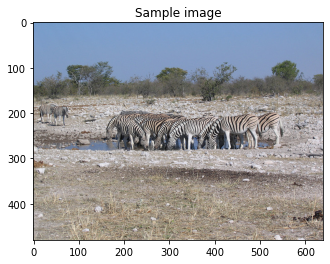

A herd of zebra grazing on a lush green field.


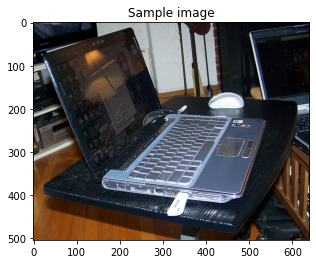

A laptop computer sitting on top of a wooden desk.


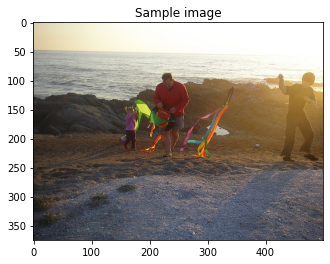

A man riding a wave on top of a surfboard.


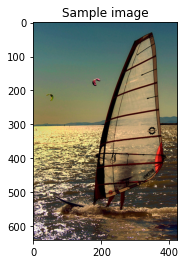

A large boat is flying in the sky over water.


In [29]:
count, max = 0, 5
 
for original_image, image in data_loader:
    
    plt.imshow(np.squeeze(original_image))
    plt.title("Sample image") 
    plt.show()

    print(result_to_text(model.sample(image), vocabulary))
    
    count += 1
    
    if count >= max:
        break

# Results

The model has definitely caught some kind of relationship between the picture and the caption. The generated captions are far from good results, however the model can detect a train, herd of zebra, or a laptop and generate caption with the correct meaning.